In [1]:
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import json
import pandas as pd

In [2]:
%pwd

'/home/jyuwei/code/WordEmbedding-SubCulture/src'

            mae_e     mae_p     mae_a
epsilon                              
0.01     0.721666  0.752657  0.752997
0.05     0.719983  0.752942  0.751678
0.10     0.717738  0.753379  0.752319
0.20     0.719394  0.751701  0.746983
0.50     0.717016  0.750331  0.745239


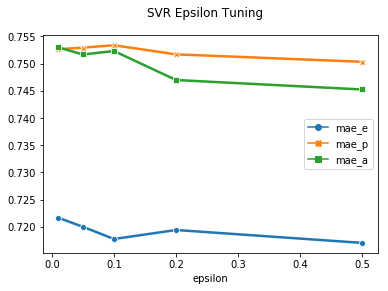

In [13]:
def plot_svr():
    with open('../result/epa_expansion/svr/result_grid_search_seed_8500_eval_1000_epa_1.0', 'r') as fp:
        data = json.load(fp)
    result = []
    for item in data:
        result.append([
            item['epsilon'],
            item['metrics'][0][0],
            item['metrics'][0][1],
            item['metrics'][0][2]
        ])
    df = pd.DataFrame(data=result, columns=['epsilon', 'mae_e', 'mae_p', 'mae_a']).set_index('epsilon')
    print(df)
    plt.suptitle('SVR Epsilon Tuning')
    sns.lineplot(data=df, linewidth=2.5, dashes=False, markers=True)
plot_svr()

In [17]:
def plot_nn():
    with open('../result/epa_expansion/nn/result_grid_search_seed_8500_eval_1000_epa_1.0', 'r') as fp:
        data = json.load(fp)
    result = []
    for item in data:
        result.append([
            item['epoch'],
            item['batch'],
            [round(f, 2) for f in item['mae'][0]]
        ])
    df = pd.DataFrame(data=result, columns=['epoch', 'batch', 'mae']).pivot('batch', 'epoch', 'mae')
    print(df)
plot_nn()

epoch                 5                   10                  50   \
batch                                                               
5      [0.68, 0.77, 0.75]   [0.7, 0.74, 0.77]  [0.74, 0.85, 0.88]   
10     [0.69, 0.78, 0.75]  [0.67, 0.77, 0.75]   [0.7, 0.83, 0.91]   
50      [0.7, 0.77, 0.76]   [0.7, 0.76, 0.77]  [0.71, 0.79, 0.79]   
100    [0.72, 0.77, 0.77]  [0.69, 0.75, 0.77]  [0.72, 0.78, 0.79]   

epoch                 100                 200  
batch                                          
5      [0.79, 0.87, 0.91]  [0.81, 0.88, 0.95]  
10     [0.79, 0.88, 0.91]  [0.77, 0.89, 0.96]  
50     [0.79, 0.87, 0.93]   [0.8, 0.95, 0.94]  
100    [0.76, 0.85, 0.86]  [0.84, 0.91, 0.93]  


In [19]:
def plot_graph():
    with open('../result/epa_expansion/graph/result_grid_search_seed_8500_eval_1000_epa_1.0', 'r') as fp:
        data = json.load(fp)
    result = []
    for item in data:
        result.append([
            item['enn'],
            item['exp'],
            [round(f, 3) for f in item['metrics']['mae']]
        ])
    df = pd.DataFrame(data=result, columns=['enn', 'exp', 'mae']).pivot('exp', 'enn', 'mae')
    print(df)
plot_graph()

enn                   0.4                    0.5                    0.6  \
exp                                                                       
0.5  [0.854, 0.845, 0.91]  [0.764, 0.755, 0.799]   [0.767, 0.72, 0.781]   
1.0  [0.853, 0.845, 0.91]  [0.763, 0.756, 0.798]   [0.766, 0.719, 0.78]   
2.0  [0.852, 0.845, 0.91]  [0.761, 0.756, 0.796]  [0.763, 0.718, 0.778]   

enn                    0.7                    0.8  
exp                                                
0.5  [0.848, 0.748, 0.829]  [0.925, 0.797, 0.871]  
1.0  [0.847, 0.747, 0.828]   [0.924, 0.796, 0.87]  
2.0  [0.844, 0.745, 0.826]  [0.922, 0.795, 0.869]  
